In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

from RBM import RBM
from utils import show_img

Using TensorFlow backend.


# Load & pre-process data

In [2]:
num_class = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, np.prod(input_shape)).astype('float32') / 255
x_test = x_test.reshape(-1, np.prod(input_shape)).astype('float32') / 255

# y_train = to_categorical(y_train, num_class)
# y_test = to_categorical(y_test, num_class)

In [3]:
batch = []
for i in range(10):
    batch.append( x_train[np.where(y_train == i)[0],] )

# Params

In [4]:
q = 10
n = np.prod(input_shape)

# Code

In [5]:
rbm = RBM(q, n)

100%|██████████| 20/20 [00:26<00:00,  1.30s/it]


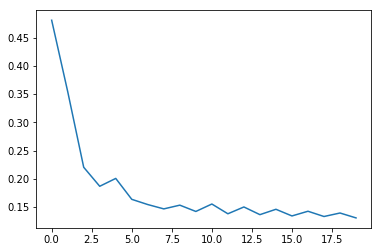

In [6]:
rbm.train(batch[6], epochs=20, lr=1e-4)

In [7]:
output = rbm.backward(rbm.forward(np.random.normal(size=(1, 784))))

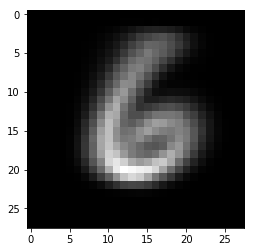

In [8]:
show_img(output)